# Work From Home (WFH), Work From Office (WFO) Classification
### Name: Pranava Kadiyala

---
## Installing and loading packages

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score 
import time

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

Outline:
- Data Setip
- Initial Visualizations
- Feature Engineering
- Model Fitting, Tuning, Validation and Selection
- Conclusion

---
## Data Setup

In [5]:
#read data
df = pd.read_csv("data/WFH_WFO_dataset.csv")
df.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [6]:
#checking dimensionality and sample size
df.shape

(207, 19)

In [7]:
#initial look at the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,59.899917,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,52.500000,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,104.000000,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,155.500000,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,207.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
#checking for nulls
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_ofiice_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

There are no missing values, hence no dropping of rows is required. However, we can drop the column 'Name' and 'ID' because they don't provide us with any additional information. This has been dealt with in the section on 'Feature Engineering' below. Similarly, categorical variables are also dealt with in that section.

---
## Initial Visualizations

I generate count plots (and histogram for continuous variable age) because they help us finding the distribution of the variable. With categorical variables it also shows us the various categories, and if they are labelled correctly. We can also use the countplots to identify the various categories in a variable.

#### Demographic characteristics

<AxesSubplot:xlabel='Age', ylabel='Count'>

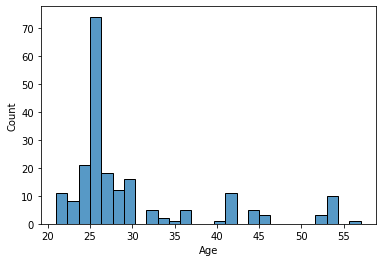

In [8]:
sns.histplot(data=df, x="Age")

There is a high concentration of younger professionals in the sample

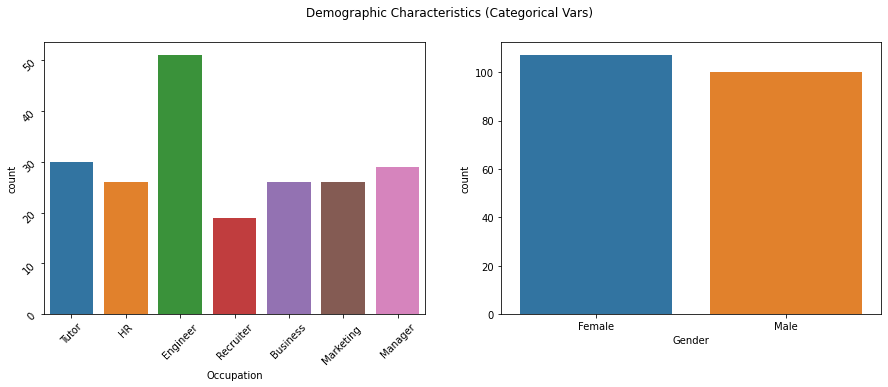

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Demographic Characteristics (Categorical Vars)')

fig1 = sns.countplot(data=df, x="Occupation", ax=axes[0])
fig1.tick_params(rotation=45)

sns.countplot(data=df, x="Gender", ax=axes[1])

plt.show()

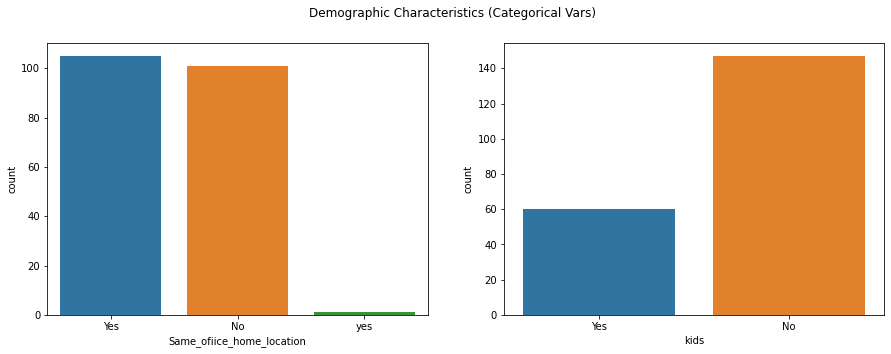

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Demographic Characteristics (Categorical Vars)')

sns.countplot(data=df, x="Same_ofiice_home_location", ax=axes[0])

sns.countplot(data=df, x="kids", ax=axes[1])

plt.show()

<AxesSubplot:xlabel='Same_ofiice_home_location', ylabel='count'>

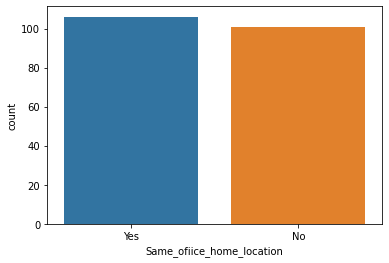

In [11]:
#fixing the issue with bad labels in Office location
df['Same_ofiice_home_location'] = df['Same_ofiice_home_location'].replace("yes", "Yes")
sns.countplot(data=df, x="Same_ofiice_home_location")

#### target variable

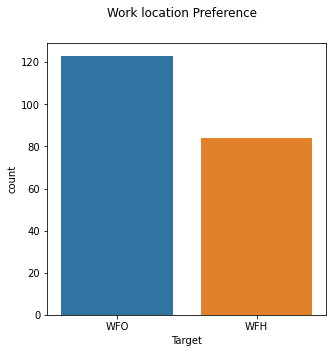

In [10]:
fig, axes = plt.subplots(figsize=(5, 5))
fig.suptitle('Work location Preference')

fig1 = sns.countplot(data=df, x="Target")
fig1.set_xticks([0, 1], ['WFO', 'WFH'])

plt.show()

We see that the target variable is unbalanced - we fix this through upsampling in sections below

---

### Feature Engineering

In [31]:
seed = 25
#using the same seed throughout

In [22]:
columns = df.columns
print(columns)

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target'],
      dtype='object')


Name and ID doesn't add any information, so dropping these column.

In [23]:
df.drop(columns=['ID', 'Name'], inplace=True)

In [24]:
#Since there are some outliers in Age, I am standardizing (seen in the visualizations above)
scaler = StandardScaler(with_mean=True)
df['Age_std'] = scaler.fit_transform(df[['Age']])
df.drop(columns=['Age'], inplace=True)
df.head()

,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Age_std
0,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1,1.806808
1,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1,-0.667733
2,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1,2.749491
3,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0,-0.432063
4,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1,-0.432063


In [25]:
#for the variables related to the opinions of work location, I generate value tables to see if they values are appropriate
WL_opinion = ['RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities']

In [15]:
for i in WL_opinion:
    print(df[[i]].value_counts())
    print('\n')

RM_save_money
Yes              156
No                51
dtype: int64


RM_quality_time
Yes                135
No                  72
dtype: int64


RM_better_sleep
No                 114
Yes                 93
dtype: int64


calmer_stressed
STRESSED           126
CALMER              81
dtype: int64


RM_professional_growth
3                         78
4                         57
2                         33
1                         21
5                         18
dtype: int64


RM_lazy
4          72
3          60
1          39
5          21
2          15
dtype: int64


RM_productive
4                69
3                66
5                45
2                24
1                 3
dtype: int64


digital_connect_sufficient
No                            108
Yes                            99
dtype: int64


RM_better_work_life_balance
3                              57
4                              54
2                              39
1                              30
5                  

'RM_professional_growth', 'RM_lazy', 'RM_productive', 'RM_better_work_life_balance' and 'RM_improved_skillset' are actually categorical variables represnting opinions and preferences over a 5point Likert scale. Hence we need to make them categorical vairables first.

In [26]:
cat = ['RM_professional_growth',
       'RM_lazy', 'RM_productive', 
       'RM_better_work_life_balance', 'RM_improved_skillset']
for i in cat:
    df[[i]] = df[[i]].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Occupation                   207 non-null    object  
 1   Gender                       207 non-null    object  
 2   Same_ofiice_home_location    207 non-null    object  
 3   kids                         207 non-null    object  
 4   RM_save_money                207 non-null    object  
 5   RM_quality_time              207 non-null    object  
 6   RM_better_sleep              207 non-null    object  
 7   calmer_stressed              207 non-null    object  
 8   RM_professional_growth       207 non-null    category
 9   RM_lazy                      207 non-null    category
 10  RM_productive                207 non-null    category
 11  digital_connect_sufficient   207 non-null    object  
 12  RM_better_work_life_balance  207 non-null    category
 13  RM_im

In [27]:
#encoding categorical variables for modelling
dummy = ['Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities']
pd_dummy = pd.get_dummies(data=df[dummy])
df = pd.concat([df,pd_dummy],axis=1).drop(columns=dummy)


In [28]:
df.head()

,Target,Age_std,Occupation_Business,Occupation_Engineer,Occupation_HR,Occupation_Manager,Occupation_Marketing,Occupation_Recruiter,Occupation_Tutor,Gender_Female,...,RM_better_work_life_balance_4,RM_better_work_life_balance_5,RM_improved_skillset_1,RM_improved_skillset_2,RM_improved_skillset_3,RM_improved_skillset_4,RM_improved_skillset_5,RM_job_opportunities_No,RM_job_opportunities_Not sure,RM_job_opportunities_Yes
0,1,1.806808,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
1,1,-0.667733,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1,2.749491,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,-0.432063,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,1,-0.432063,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


As we saw in the plot above, the target variables are not balanced. Hence below i am upsampling to make them balanced. However, upsampling can often lead to overfitting. Hence, in the following section - Modellig, I will 

In [37]:
X = df[df.columns.difference(['Target'])]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

91     0
108    1
173    0
186    0
65     1
      ..
128    0
119    1
133    1
140    1
200    0
Name: Target, Length: 144, dtype: int64

In [35]:
#using smote to uosample the minority class
sm = SMOTE(random_state=seed)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [40]:
y_train_smote.value_counts()

0    87
1    87
Name: Target, dtype: int64

---

### Model Fitting, Tuning, Validation and Selection

I model:
- Logistic Regression: Since this is a binary classification excercise and the data is small, logistic regression classifier can work well.
- Random Forest: Random Forest works very well if we want to maximise accuracy.
Juxstoposing these two very different algorithms will help find the best model with the best accuracy

To find the best models, I do the following:
- use GridSearchCV to tune the models to find the best parameters for each model. I rely on hihgest 'accuracy' scores to define best models. 
- Run same models for both upsampled and original data

In [45]:
#upsampled logistic regression - grid search
lr_up = LogisticRegression(max_iter=10000, random_state=seed)
parameters = {'solver'  : ['lbfgs', 'liblinear','newton-cg','sag','saga']}
tuning_lr_up = GridSearchCV(lr_up,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_lr_up.fit(X_train_smote,y_train_smote)
tuning_lr_up.best_params_



{'solver': 'lbfgs'}

              precision    recall  f1-score   support

         WFO      0.895     0.944     0.919        36
         WFH      0.920     0.852     0.885        27

    accuracy                          0.905        63
   macro avg      0.907     0.898     0.902        63
weighted avg      0.906     0.905     0.904        63



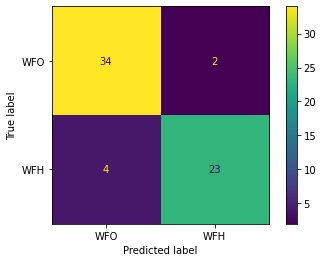

In [46]:
#upsampled logistic regression - fitting
lr_up = LogisticRegression(max_iter=1000, random_state=seed, solver='lbfgs')
lr_up.fit(X_train_smote, y_train_smote)
lr_pred = lr_up.predict(X_test)

cm_lr_up = confusion_matrix(y_test, lr_pred)
display_cm_lr_up = ConfusionMatrixDisplay(confusion_matrix=cm_lr_up,display_labels=['WFO','WFH'])
display_cm_lr_up.plot()


print(classification_report(y_test, lr_pred, digits=3, target_names=['WFO','WFH']))

In [47]:
#original data logsitic regression - grid search
lr = LogisticRegression(max_iter=10000, random_state=seed)
parameters = {'solver'  : ['lbfgs', 'liblinear','newton-cg','sag','saga']}
tuning_lr = GridSearchCV(lr,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_lr.fit(X_train,y_train)
tuning_lr.best_params_

{'solver': 'lbfgs'}

              precision    recall  f1-score   support

         WFO      0.900     1.000     0.947        36
         WFH      1.000     0.852     0.920        27

    accuracy                          0.937        63
   macro avg      0.950     0.926     0.934        63
weighted avg      0.943     0.937     0.936        63



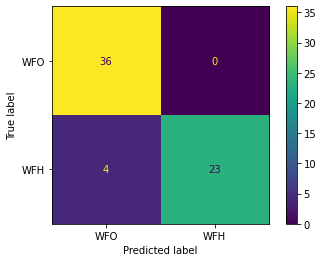

In [48]:
#original data logsitic regression - fitting
lr = LogisticRegression(max_iter=1000,random_state=seed, solver='lbfgs')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

cm_lr = confusion_matrix(y_test, lr_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=['WFO','WFH'])
display_cm_lr.plot()


print(classification_report(y_test, lr_pred, digits=3, target_names=['WFO','WFH']))

In [58]:
#upsampled random forest - grid search
start = time.time()
rf_up = RandomForestClassifier(random_state=seed)
parameters = {'n_estimators'  : [50, 100, 150, 200],
              'max_depth': [5, 10, 20, 30, None],
             'min_samples_split': [2, 5, 7, 10]}
tuning_rf_up = GridSearchCV(rf_up,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_rf_up.fit(X_train_smote,y_train_smote)
print(tuning_rf_up.best_params_)

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Computation time (seconds): 84.179


              precision    recall  f1-score   support

         WFO      1.000     1.000     1.000        36
         WFH      1.000     1.000     1.000        27

    accuracy                          1.000        63
   macro avg      1.000     1.000     1.000        63
weighted avg      1.000     1.000     1.000        63



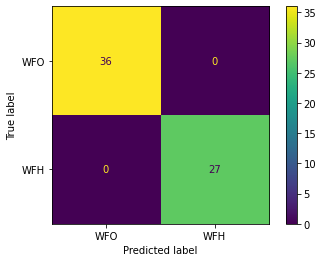

In [62]:
#upsampled random forest - fitting
rf_up = RandomForestClassifier(max_depth= 10, min_samples_split = 2, n_estimators = 50, random_state=seed)
rf_up.fit(X_train_smote, y_train_smote)
rf_pred = rf_up.predict(X_test)

cm_rf_up = confusion_matrix(y_test, rf_pred)
display_cm_rf_up = ConfusionMatrixDisplay(confusion_matrix=cm_rf_up,display_labels=['WFO','WFH'])
display_cm_rf_up.plot()


print(classification_report(y_test, rf_pred, digits=3, target_names=['WFO','WFH']))

In [59]:
#original data random forest - grid search
start = time.time()
rf = RandomForestClassifier(random_state=seed)
parameters = {'n_estimators'  : [50, 100, 150, 200],
              'max_depth': [5, 10, 20, 30, None],
             'min_samples_split': [2, 5, 7, 10]}
tuning_rf = GridSearchCV(rf,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring='accuracy',        # metric for scoring
                      cv=10)
tuning_rf.fit(X_train,y_train)
print(tuning_rf.best_params_)

computation_time = (time.time()-start)
print("Computation time (seconds): %5.3f"%computation_time)

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Computation time (seconds): 83.975


              precision    recall  f1-score   support

         WFO      1.000     1.000     1.000        36
         WFH      1.000     1.000     1.000        27

    accuracy                          1.000        63
   macro avg      1.000     1.000     1.000        63
weighted avg      1.000     1.000     1.000        63



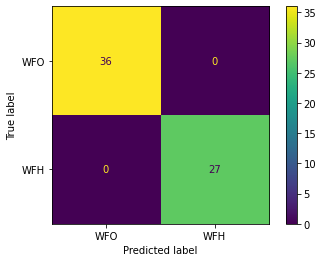

In [61]:
#original data random forest - fitting
rf = RandomForestClassifier(max_depth= 10, min_samples_split = 2, n_estimators = 50, random_state=seed)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred)
display_cm_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['WFO','WFH'])
display_cm_rf.plot()


print(classification_report(y_test, rf_pred, digits=3, target_names=['WFO','WFH']))

Random Forest performs much better than logistic regression for both resampled and original data. We see Random Forest performing the same for both resampled and original data (and even giving out the same hyperparameters) because random forest doesn't get affected too badly with unbalanced data. The gap in the minority and majority class isn't too large.

As expected, logistic regression performs worse relatively. However, the tuned model with original data does not perforn too terribly. Given the higher computational time for random forest, logistic regression can provide a good alternative for smaller datasets.

I also plot ROC and AUC curves as it is a common metric used to find the best model amongst various algorithms. In the graph below we want the curve to bow as much to the top left as possible - indicating high true positve rate but low false positive rate.

In [63]:
# Generating ROC and AUC

#original
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
lr_auc= roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])


#up sampled data
rf_up_auc = roc_auc_score(y_test, rf_up.predict_proba(X_test)[:, 1])
lr_up_auc= roc_auc_score(y_test, lr_up.predict_proba(X_test)[:, 1])
rf_up_fpr, rf_up_tpr, rf_up_threshold = roc_curve(y_test, rf_up.predict_proba(X_test)[:, 1])
lr_up_fpr, lr_up_tpr, lr_up_threshold = roc_curve(y_test, lr_up.predict_proba(X_test)[:, 1])


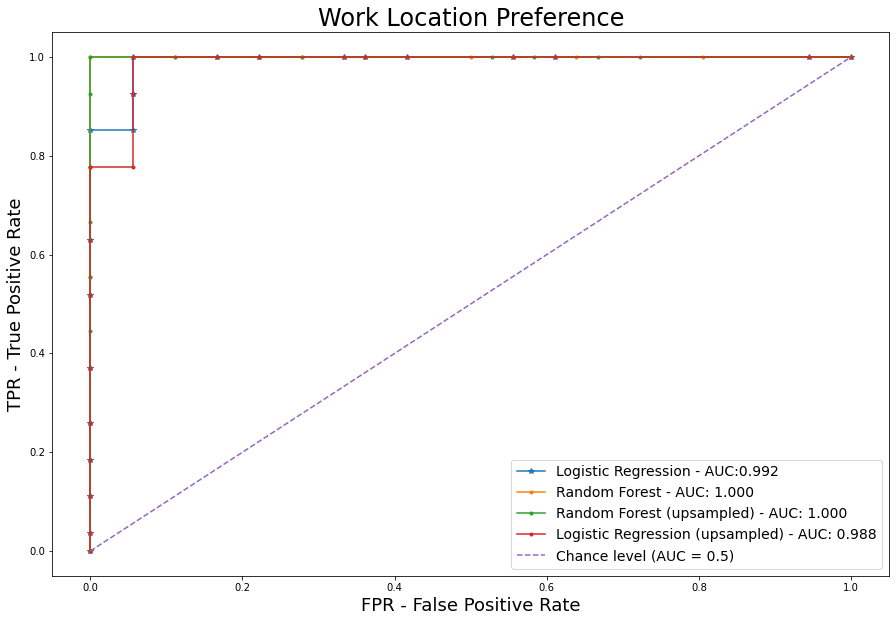

In [65]:
plt.figure(figsize=(15, 10))
plt.plot(lr_fpr, lr_tpr, marker='*', label='Logistic Regression - AUC:%.3f' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest - AUC: %.3f' % rf_auc)

plt.plot(rf_up_fpr, rf_up_tpr, marker='.', label='Random Forest (upsampled) - AUC: %.3f' % rf_up_auc)
plt.plot(lr_up_fpr, lr_up_tpr, marker='.', label='Logistic Regression (upsampled) - AUC: %.3f' % lr_up_auc)
plt.plot([0, 1], [0, 1], "--", label="Chance level (AUC = 0.5)")
plt.xlabel('FPR - False Positive Rate', fontsize=18)
plt.ylabel('TPR - True Positive Rate', fontsize=18)
plt.title('Work Location Preference',  fontsize=24)
plt.legend(loc='lower right', fontsize=14)
plt.show()

As is obvious from the confusion matrix (reporting accuray) itself, random forest algorithms are more bowed to the top left, making them better classifiers.

#### Conclusion
To model binary preferences such as location of work - Work From Home or Work From Office, Random Forest model gives us best results. Random Forest also works well without having to resample if the class imbalance isn't too large. Further, logistic regressions can work acceptably if the sample is not too large. 

---

### REFERENCES 

* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html